In [1]:
import numpy as np
import pandas as pd
import collections
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine = datasets.load_wine()

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
wine.data.shape

(178, 13)

In [6]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
collections.Counter(wine.target)

Counter({0: 59, 1: 71, 2: 48})

In [8]:
# split dataset into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size=0.3,random_state=109)

#create a gaussian classifier
gnb = GaussianNB()

#train the model using the training dataset
gnb.fit(X_train,y_train)

#predict the target using the test dataset
y_pred = gnb.predict(X_test)

#evaluate model accuracy
acc = metrics.accuracy_score(y_test,y_pred)
print('{:.4f}'.format(acc))

0.9074


In [9]:
#confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[20  1  0]
 [ 2 15  2]
 [ 0  0 14]]


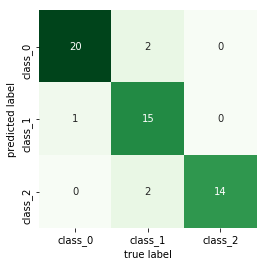

In [10]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap="Greens",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Lets check the number of samples in train and test for each class.  As we can see below, the dataset is not split according the class size proportionly

In [11]:
collections.Counter(y_train),collections.Counter(y_test)

(Counter({2: 34, 1: 52, 0: 38}), Counter({0: 21, 1: 19, 2: 14}))

stratified split can improve the accuracy significantly

In [12]:
# split dataset into train and test dataset 
X_train,X_test,y_train,y_test = train_test_split(wine.data,wine.target,stratify=wine.target,
                                                 test_size=0.3,random_state=109)

In [13]:
collections.Counter(y_train),collections.Counter(y_test)

(Counter({0: 41, 2: 33, 1: 50}), Counter({0: 18, 2: 15, 1: 21}))

In [14]:
#create a gaussian classifier
gnb = GaussianNB()

#train the model using the training dataset
gnb.fit(X_train,y_train)

#predict the target using the test dataset
y_pred = gnb.predict(X_test)

#evaluate model accuracy
acc = metrics.accuracy_score(y_test,y_pred)
print('{:.4f}'.format(acc))

0.9815


In [15]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


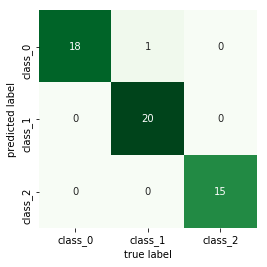

In [16]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap="Greens",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

increase the training dataset can further improve the accuracy

In [17]:
# split dataset into train and test dataset 
X_train,X_test,y_train,y_test = train_test_split(wine.data,wine.target,stratify=wine.target,
                                                 test_size=0.2,random_state=109)

#create a gaussian classifier
gnb = GaussianNB()

#train the model using the training dataset
gnb.fit(X_train,y_train)

#predict the target using the test dataset
y_pred = gnb.predict(X_test)

#evaluate model accuracy
acc = metrics.accuracy_score(y_test,y_pred)
print('{:.4f}'.format(acc))

1.0000
